In [1]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.image as mpimg

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.externals.six import StringIO
from sklearn import tree
from sklearn import metrics
import pydotplus
import seaborn as sns
import scipy.optimize as opt
%matplotlib inline 
import csv
%matplotlib inline
mpl.style.use('ggplot') # optional: for ggplot-like style
# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.0


# **Load CSV file**

In [2]:
#download: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-22 02:05:13--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

Data-Collisions.csv 100%[===================>]  70.49M  21.3MB/s    in 3.5s    

2020-09-22 02:05:17 (20.2 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



In [3]:
#Load Data From Data-Collisions.csv File
df = pd.read_csv('Data-Collisions.csv')
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [4]:
#get size of dataset
df.shape
# Viewing the columns present in the dataset
#df.columns


(194673, 38)

In [5]:
#Check the data type of each column
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [6]:
#check all the columns including those that are of type object. Descriptives statustics df.describe() for numerical data
#df.describe(include = "all")
#df.corr()
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [7]:
#Converr serveritycode to 0 for Injury Collision and 1 for Property Damage Only Collision
a = np.array(df['SEVERITYCODE'].values.tolist())
print(a)
#replace severity 2 with value 0
df['SEVERITYCODE'] = np.where(a > 1, 0, a).tolist()
print (df)


[2 1 1 ... 2 2 1]
        SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY  \
0                  0 -122.323148  47.703140         1    1307       1307   
1                  1 -122.347294  47.647172         2   52200      52200   
2                  1 -122.334540  47.607871         3   26700      26700   
3                  1 -122.334803  47.604803         4    1144       1144   
4                  0 -122.306426  47.545739         5   17700      17700   
...              ...         ...        ...       ...     ...        ...   
194668             0 -122.290826  47.565408    219543  309534     310814   
194669             1 -122.344526  47.690924    219544  309085     310365   
194670             0 -122.306689  47.683047    219545  311280     312640   
194671             0 -122.355317  47.678734    219546  309514     310794   
194672             1 -122.289360  47.611017    219547  308220     309500   

       REPORTNO   STATUS      ADDRTYPE   INTKEY  ... ROADCOND  \
0   

In [8]:
#Drop these columns which will not beeb used in ML model
df=df.drop(labels=['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE','ADDRTYPE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'], axis=1)

In [9]:
# General Information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   SEVERITYCODE  194673 non-null  int64 
 1   SEVERITYDESC  194673 non-null  object
 2   WEATHER       189592 non-null  object
 3   ROADCOND      189661 non-null  object
 4   LIGHTCOND     189503 non-null  object
dtypes: int64(1), object(4)
memory usage: 7.4+ MB


In [10]:
#total number of empty inputs in " ROADCOND" ?
df.isnull().sum()

SEVERITYCODE       0
SEVERITYDESC       0
WEATHER         5081
ROADCOND        5012
LIGHTCOND       5170
dtype: int64

In [11]:
df.head(5)

,SEVERITYCODE,SEVERITYDESC,WEATHER,ROADCOND,LIGHTCOND
0,0,Injury Collision,Overcast,Wet,Daylight
1,1,Property Damage Only Collision,Raining,Wet,Dark - Street Lights On
2,1,Property Damage Only Collision,Overcast,Dry,Daylight
3,1,Property Damage Only Collision,Clear,Dry,Daylight
4,0,Injury Collision,Raining,Wet,Daylight


# **pre-processing data**
### Identify and handle missing values; Data normalization; Turning categorical values to numeric variables for classification machine learning algorithm decision tree and Logistic regression 


In [12]:
df.replace('Unknown', np.NaN, inplace=True)

In [13]:
# there are # rows with null value for WEATHER(5081/194673),ROADCOND(5012/194673),LIGHTCOND(5170/194673)
#df.dropna(subset=["price"], axis=0, inplace=True)
df = df.dropna()
df.shape

(170510, 5)

In [14]:
#reset the index after drop the data
df.reset_index(drop=True, inplace=True) 

In [15]:
#Total # of observations used
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170510 entries, 0 to 170509
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   SEVERITYCODE  170510 non-null  int64 
 1   SEVERITYDESC  170510 non-null  object
 2   WEATHER       170510 non-null  object
 3   ROADCOND      170510 non-null  object
 4   LIGHTCOND     170510 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.5+ MB
None


In [35]:
#check frequency distribuegories within this column and Summarize the categorical data using value_counts()
print(df['ADDRTYPE'].value_counts)

#print(Collision_data_clean['SEVERITYCODE'].value_counts())

<bound method IndexOpsMixin.value_counts of 0         Intersection
1                Block
2                Block
3                Block
4         Intersection
              ...     
169776           Block
169777           Block
169778    Intersection
169779    Intersection
169780           Block
Name: ADDRTYPE, Length: 169781, dtype: object>


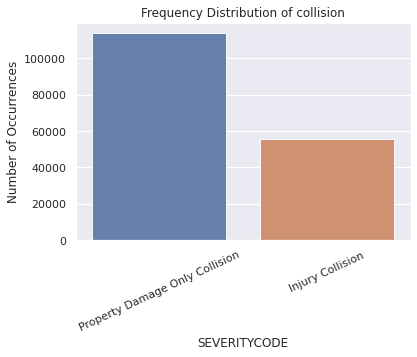

In [14]:
#collision_count = df['SEVERITYDESC'].value_counts()
#sns.set(style="darkgrid")
#sns.barplot(collision_count.index, collision_count.values, alpha=0.9)
#plt.title('Frequency Distribution of collision')
#plt.ylabel('Number of Occurrences', fontsize=12)
#plt.xlabel('SEVERITYCODE', fontsize=12)
#plt.xticks(rotation=25)
#plt.show()

In [16]:
# create 2 categories of weather: clear, non-clear to Binning of Data 
df['WEATHER'].replace(('Snowing', 'Raining','Overcast','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind', 'Partly Cloudy', 'Other'), 'non-clear-weather', inplace=True)

In [17]:
print(df['WEATHER'].value_counts())

Clear                108960
non-clear-weather     61550
Name: WEATHER, dtype: int64


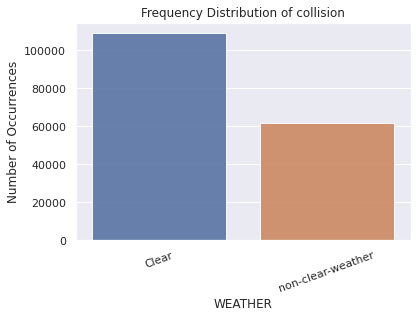

In [18]:
collision_count = df['WEATHER'].value_counts()
sns.set(style="darkgrid")
sns.barplot(collision_count.index, collision_count.values, alpha=0.9)
plt.title('Frequency Distribution of collision')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('WEATHER', fontsize=12)
plt.xticks(rotation=20)
plt.show()

In [19]:
# create 2 categories of road condition
df['ROADCOND'].replace(('Snow/Slush', 'Wet', 'Other','Standing Water','Ice', 'Oil', 'Sand/Mud/Dirt'),'Other Road Condition', inplace=True)

In [20]:
print(df['ROADCOND'].value_counts())

Dry                     121754
Other Road Condition     48756
Name: ROADCOND, dtype: int64


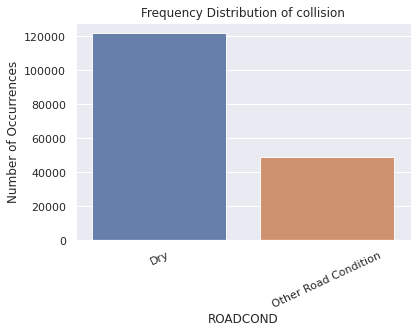

In [21]:
collision_count = df['ROADCOND'].value_counts()
sns.set(style="darkgrid")
sns.barplot(collision_count.index, collision_count.values, alpha=0.9)
plt.title('Frequency Distribution of collision')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('ROADCOND', fontsize=12)
plt.xticks(rotation=25)
plt.show()

In [22]:
# create 2 categories: daylight, non-daylight
df['LIGHTCOND'].replace(('Dark - Street Lights On', 'Dusk', 'Dawn', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Other', 'Dark - Unknown Lighting'), 'Non-Daylight', inplace=True)

In [23]:
df['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,112836
Non-Daylight,57674


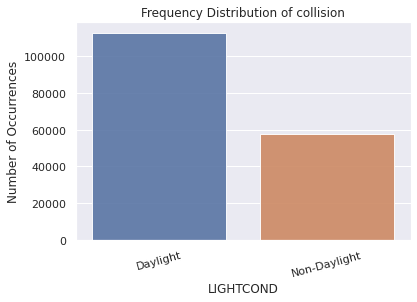

In [24]:
collision_count = df['LIGHTCOND'].value_counts()
sns.set(style="darkgrid")
sns.barplot(collision_count.index, collision_count.values, alpha=0.9)
plt.title('Frequency Distribution of collision')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('LIGHTCOND', fontsize=12)
plt.xticks(rotation=15)
plt.show()

In [25]:
#df.groupby(['SEVERITYCODE'])['WEATHER'].value_counts(normalize=True).round(4).to_frame()
#df.groupby(['SEVERITYCODE'])['ROADCOND'].value_counts(normalize=True).round(4).to_frame()
df.groupby(['SEVERITYCODE'])['LIGHTCOND'].value_counts(normalize=True).round(4).to_frame()

LIGHTCOND
SEVERITYCODE LIGHTCOND              
0            Daylight         0.6832
             Non-Daylight     0.3168
1            Daylight         0.6513
             Non-Daylight     0.3487

In [26]:
# for categorical variable, they should be dummy or indicator coded if using logical regression
weather_D=pd.get_dummies(df['WEATHER'])
weather_D.head()

,Clear,non-clear-weather
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


In [27]:
roadcond_D=pd.get_dummies(df['ROADCOND'])
roadcond_D.head

<bound method NDFrame.head of         Dry  Other Road Condition
0         0                     1
1         0                     1
2         1                     0
3         1                     0
4         0                     1
...     ...                   ...
170505    1                     0
170506    0                     1
170507    1                     0
170508    1                     0
170509    0                     1

[170510 rows x 2 columns]>

In [28]:
light_D=pd.get_dummies(df['LIGHTCOND'])
light_D.head()

,Daylight,Non-Daylight
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [29]:
df = pd.concat([df, weather_D,roadcond_D,light_D], axis=1)
df.head()

,SEVERITYCODE,SEVERITYDESC,WEATHER,ROADCOND,LIGHTCOND,Clear,non-clear-weather,Dry,Other Road Condition,Daylight,Non-Daylight
0,0,Injury Collision,non-clear-weather,Other Road Condition,Daylight,0,1,0,1,1,0
1,1,Property Damage Only Collision,non-clear-weather,Other Road Condition,Non-Daylight,0,1,0,1,0,1
2,1,Property Damage Only Collision,non-clear-weather,Dry,Daylight,0,1,1,0,1,0
3,1,Property Damage Only Collision,Clear,Dry,Daylight,1,0,1,0,1,0
4,0,Injury Collision,non-clear-weather,Other Road Condition,Daylight,0,1,0,1,1,0


In [30]:
df=df.drop(labels=['WEATHER', 'ROADCOND', 'LIGHTCOND'], axis=1)
df.head()

,SEVERITYCODE,SEVERITYDESC,Clear,non-clear-weather,Dry,Other Road Condition,Daylight,Non-Daylight
0,0,Injury Collision,0,1,0,1,1,0
1,1,Property Damage Only Collision,0,1,0,1,0,1
2,1,Property Damage Only Collision,0,1,1,0,1,0
3,1,Property Damage Only Collision,1,0,1,0,1,0
4,0,Injury Collision,0,1,0,1,1,0


In [31]:
#define X, and y for this dataset:
df_log = df [['SEVERITYCODE','Clear','non-clear-weather','Dry','Other Road Condition','Daylight','Non-Daylight']]
df_log.head()

,SEVERITYCODE,Clear,non-clear-weather,Dry,Other Road Condition,Daylight,Non-Daylight
0,0,0,1,0,1,1,0
1,1,0,1,0,1,0,1
2,1,0,1,1,0,1,0
3,1,1,0,1,0,1,0
4,0,0,1,0,1,1,0


In [32]:
#Convert pandas data frame to numpy arrary
#X = df[['Clear','non-clear-weather','Dry','Other Road Condition','Daylight','Non-Daylight']].values
X = np.asarray(df_log[['Clear','non-clear-weather','Dry','Other Road Condition','Daylight','Non-Daylight']])
X[0:5]

array([[0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 1],
       [0, 1, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 1, 0]], dtype=uint8)

In [33]:
y = np.asarray(df_log['SEVERITYCODE'])
y [0:5]

array([0, 1, 1, 1, 0])

In [34]:
#Also let's normalize the dataset
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.33051421,  1.33051421, -1.5802565 ,  1.5802565 ,  0.7149344 ,
        -0.7149344 ],
       [-1.33051421,  1.33051421, -1.5802565 ,  1.5802565 , -1.39872973,
         1.39872973],
       [-1.33051421,  1.33051421,  0.63280866, -0.63280866,  0.7149344 ,
        -0.7149344 ],
       [ 0.75158911, -0.75158911,  0.63280866, -0.63280866,  0.7149344 ,
        -0.7149344 ],
       [-1.33051421,  1.33051421, -1.5802565 ,  1.5802565 ,  0.7149344 ,
        -0.7149344 ]])

In [35]:
#train_test_split will return 4 different parameters: X_trainset, X_testset, y_trainset, y_testset 
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=4)
print ('logical reg Train set:', X_trainset.shape,  y_trainset.shape)
print ('logical reg Test set:', X_testset.shape,  y_testset.shape)

#X1_trainset, X1_testset, y1_trainset, y1_testset = train_test_split(X, y1, test_size=0.3, random_state=4)
#print ('decision tree Train set:', X1_trainset.shape,  y1_trainset.shape)
#print ('decision tree Test set:', X1_testset.shape,  y1_testset.shape)


logical reg Train set: (136408, 6) (136408,)
logical reg Test set: (34102, 6) (34102,)


In [64]:
#create an instance of the DecisionTreeClassifier called crashTree.
#crashTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
#crashTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
#crashTree.fit(X1_trainset,y1_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
#predTree = crashTree.predict(X1_testset)
#print (predTree [0:5])
#print (y1_testset [0:5])

['Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision' 'Property Damage Only Collision'
 'Property Damage Only Collision']
55331     Property Damage Only Collision
111128                  Injury Collision
55856     Property Damage Only Collision
120778    Property Damage Only Collision
3404      Property Damage Only Collision
Name: SEVERITYDESC, dtype: object


In [ ]:
#from sklearn.matrics import confusion_matrix
#print(confusion_matrix(y_testset,predTree ,labels=[1,0]))

In [67]:
#import metrics from sklearn and check the accuracy of our model. 

#print("desicion tree Train set Accuracy: ", metrics.accuracy_score(y1_trainset, crashTree.predict(X1_trainset)))
#print("desicion tree Test set Accuracy: ", metrics.accuracy_score(y1_testset , predTree))
#Building the confusion matrix
#print (classification_report(y1_testset, predTree))

desicion tree Train set Accuracy:  0.6720929648030698
desicion tree Test set Accuracy:  0.6732742947627706


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                                precision    recall  f1-score   support

              Injury Collision       0.00      0.00      0.00     16713
Property Damage Only Collision       0.67      1.00      0.80     34440

                     micro avg       0.67      0.67      0.67     51153
                     macro avg       0.34      0.50      0.40     51153
                  weighted avg       0.45      0.67      0.54     51153



In [60]:
#
#  install the pydotplus and graphviz libraries if you have not installed these before
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    pydotplus-2.0.2            |     pyhd1c1de3_3          23 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.1 MB

The following NEW packages will be INSTALLED:

  pydotplus          conda-forge/noarch::pydotplus-2.0.2-pyhd1c1de3_3

The following packages will be UPDATED:

  openssl                                 1.1.1g-h516909a_0 --> 1.1.1g-h516909a

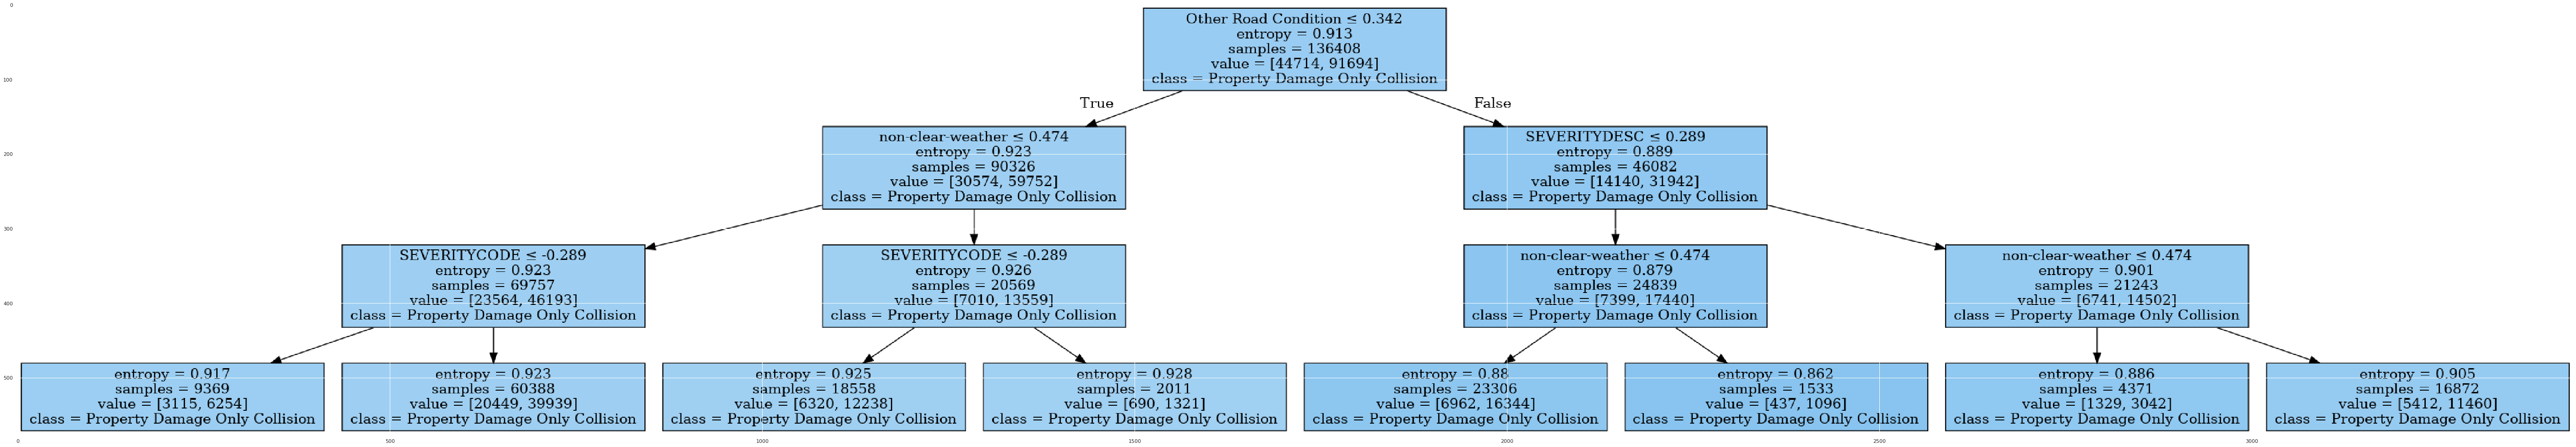

In [61]:
#dot_data = StringIO()
#filename = "crashTree.png"
#featureNames = df.columns[0:6]
#targetNames = df["SEVERITYDESC"].unique().tolist()
#out=tree.export_graphviz(crashTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y1_trainset), filled=True,  special_characters=True,rotate=False)  
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png(filename)
#img = mpimg.imread(filename)
#plt.figure(figsize=(100, 200))
#plt.imshow(img,interpolation='nearest')

In [36]:
#build the model using LogisticRegression from Scikit-learn package
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)

LR = LogisticRegression(C=0.01, solver='sag').fit(X_trainset,y_trainset)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
#predict using test set:
yhat = LR.predict(X_testset)
yhat

array([1, 1, 1, ..., 1, 1, 1])

In [38]:
#predict_proba returns estimates for all classes, ordered by the label of classes. 
#the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):
yhat_prob = LR.predict_proba(X_testset)
yhat_prob

array([[0.33618243, 0.66381757],
       [0.30316437, 0.69683563],
       [0.30316437, 0.69683563],
       ...,
       [0.33716765, 0.66283235],
       [0.33618243, 0.66381757],
       [0.3123208 , 0.6876792 ]])

In [39]:
#using jaccard index for accuracy evaluation
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_testset, yhat)

0.6734209137294

In [40]:
#try f1_score from sklearn library:
from sklearn.metrics import f1_score
f1_score(y_testset, yhat, average='weighted')

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.5419983978059358

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_testset, yhat, labels=[1,0]))

[[22965     0]
 [11137     0]]


Confusion matrix, without normalization
[[22965     0]
 [11137     0]]


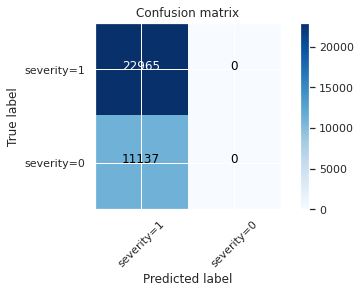

In [42]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_testset, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['severity=1','severity=0'],normalize= False,  title='Confusion matrix')

In [43]:
print (classification_report(y_testset, yhat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11137
           1       0.67      1.00      0.80     22965

   micro avg       0.67      0.67      0.67     34102
   macro avg       0.34      0.50      0.40     34102
weighted avg       0.45      0.67      0.54     34102



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
from sklearn.metrics import log_loss
log_loss(y_testset, yhat_prob)

0.6311720287986469

In [45]:
LR2 = LogisticRegression(C=0.01, solver='liblinear').fit(X_trainset,y_trainset)
yhat_prob2 = LR2.predict_proba(X_testset)
print ("LogLoss: : %.2f" % log_loss(y_testset, yhat_prob2))

LogLoss: : 0.63
